In [1]:
import os
import yaml
import torch
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

In [9]:


def load_hparams(hparams_file):
    with open(hparams_file, 'r') as f:
        hparams = yaml.safe_load(f)
    return hparams

def load_event_logs(log_dir):
    event_acc = EventAccumulator(log_dir)
    event_acc.Reload()
    return event_acc

def extract_validation_loss(event_accumulator, key='val_metrics/ssim'):
    val_loss = []
    for scalar in event_accumulator.scalars.Items(key):
        val_loss.append((scalar.step, scalar.value))
    return val_loss

def plot_validation_loss(log_dirs, labels, key='val_metrics/ssim'):
    plt.figure(figsize=(12, 8))
    plt.rc('font', size=14)  # Set the default font size for text

    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']
    color = 'black'

    for i, (log_dir, label) in enumerate(zip(log_dirs, labels)):
        event_accumulator = load_event_logs(log_dir)
        val_loss = extract_validation_loss(event_accumulator, key)
        if val_loss:
            steps, losses = zip(*val_loss)
            plt.plot(steps, losses, label=label, linestyle=line_styles[i % len(line_styles)],
                     marker=markers[i % len(markers)], color=color, linewidth=2.0, markersize=6)
        else:
            print(f"No validation loss found for {label}")

    plt.xlabel('Steps', fontsize=16)
    plt.ylabel('SSIM Value', fontsize=16)
    plt.title('Validation SSIM Comparison', fontsize=18)
    plt.legend(fontsize=14, loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('ssim_val_loss_comparison.png', dpi=300)
    plt.show()


config = {
    'log_dirs': [
        'lightning_logs/version_unet_l1',
        'lightning_logs/version_unet_roi'
    ],
    'labels': [
        'UNet using L1',
        'UNet using modified L1'
    ]
}

config['labels']

['UNet using L1', 'UNet using modified L1']

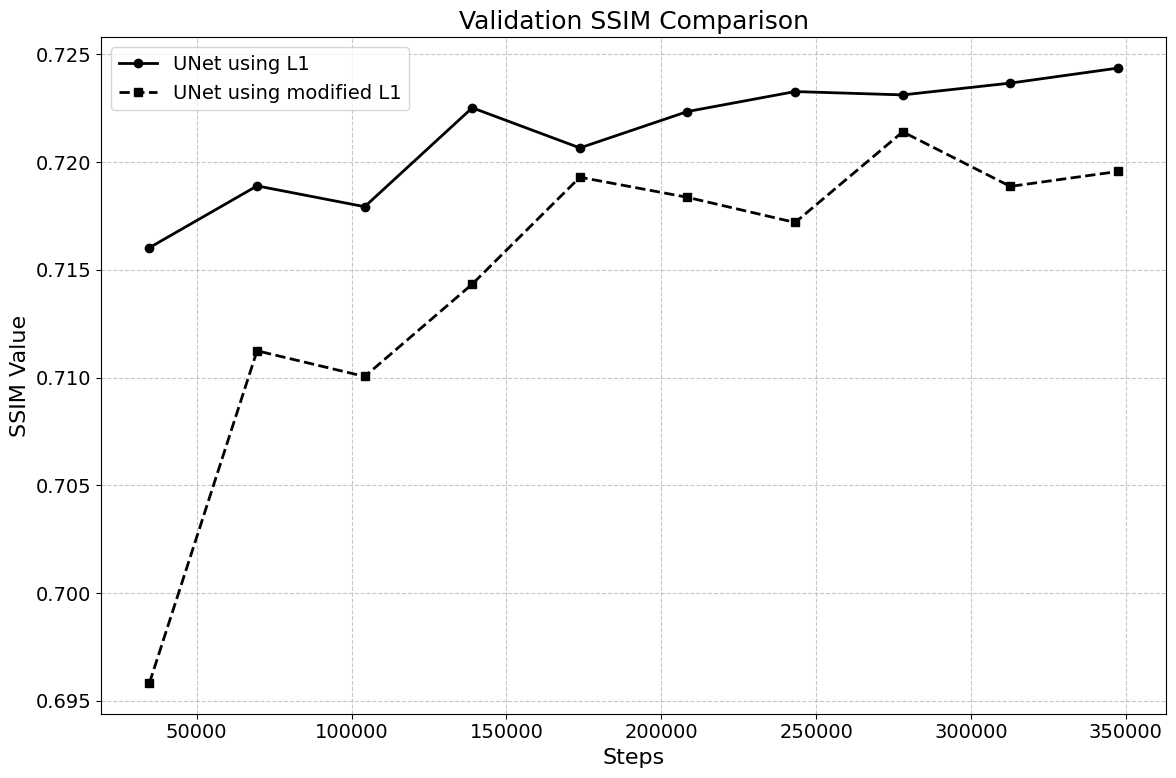

In [35]:
plot_validation_loss(config['log_dirs'], config['labels'])#, 'validation_loss')

In [36]:
def plot_val_loss(log_dirs, labels, key='validation_loss'):
    plt.figure(figsize=(12, 8))
    plt.rc('font', size=14)  # Set the default font size for text

    line_styles = ['-', '--', '-.', ':']
    markers = ['o', 's', '^', 'D']
    color = 'black'

    for i, (log_dir, label) in enumerate(zip(log_dirs, labels)):
        event_accumulator = load_event_logs(log_dir)
        val_loss = extract_validation_loss(event_accumulator, key)
        if val_loss:
            steps, losses = zip(*val_loss)
            plt.plot(steps, losses, label=label, linestyle=line_styles[i % len(line_styles)],
                     marker=markers[i % len(markers)], color=color, linewidth=2.0, markersize=6)
        else:
            print(f"No validation loss found for {label}")

    plt.xlabel('Steps', fontsize=16)
    plt.ylabel('Validation Loss (L1)', fontsize=16)
    plt.title('Validation L1 Loss Comparison', fontsize=18)
    plt.legend(fontsize=14, loc='best')
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.savefig('l1_val_loss_comparison.png', dpi=300)
    plt.show()

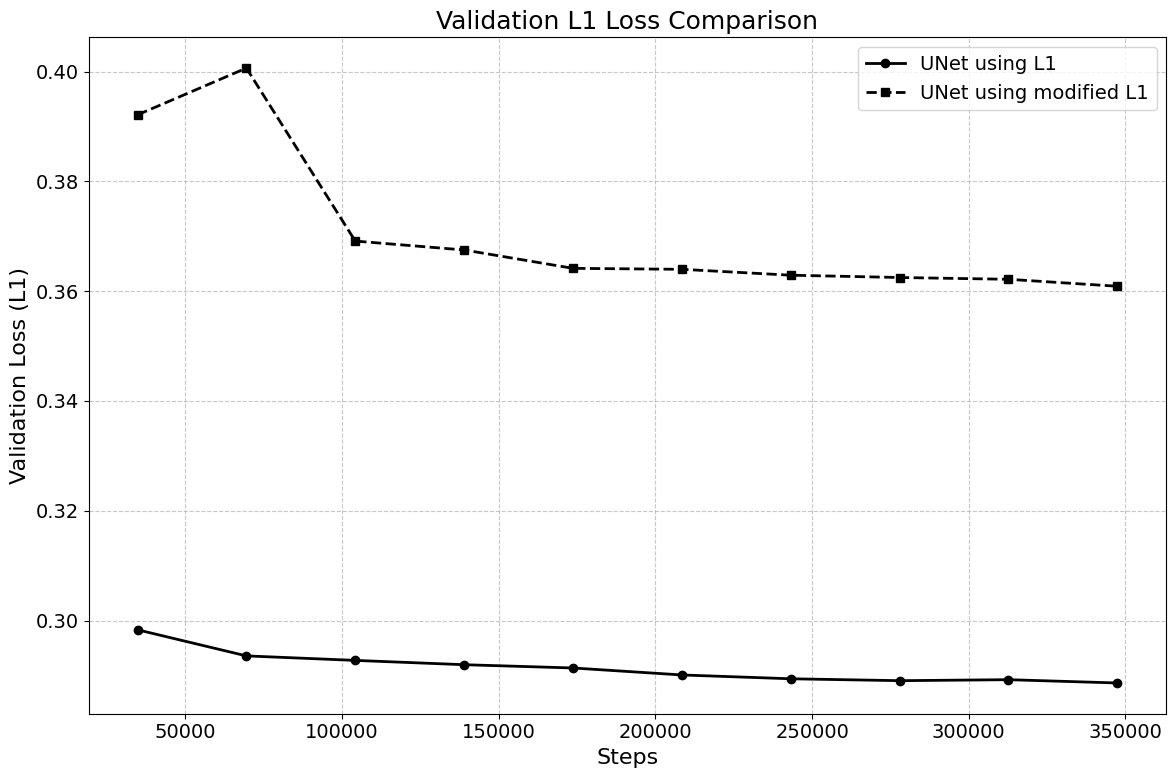

In [37]:
plot_val_loss(config['log_dirs'], config['labels'], 'validation_loss')

In [6]:
event_test = load_event_logs('lightning_logs/version_unet_l1')

In [7]:
event_test

In [8]:
event_test.scalars.Keys()

['hp_metric',
 'lr-RMSprop',
 'loss',
 'epoch',
 'validation_loss',
 'val_metrics/nmse',
 'val_metrics/ssim',
 'val_metrics/psnr']

In [13]:
event_test.scalars.Items('val_metrics/ssim')

[ScalarEvent(wall_time=1722386195.5249012, step=34741, value=0.7160285711288452),
 ScalarEvent(wall_time=1722389283.406518, step=69483, value=0.7188942432403564),
 ScalarEvent(wall_time=1722392278.172336, step=104225, value=0.7179291844367981),
 ScalarEvent(wall_time=1722395128.869919, step=138967, value=0.7225195169448853),
 ScalarEvent(wall_time=1722397977.1217878, step=173709, value=0.7206572890281677),
 ScalarEvent(wall_time=1722400849.026922, step=208451, value=0.7223464250564575),
 ScalarEvent(wall_time=1722403694.773092, step=243193, value=0.7232730388641357),
 ScalarEvent(wall_time=1722406541.278545, step=277935, value=0.7231177091598511),
 ScalarEvent(wall_time=1722409389.941785, step=312677, value=0.7236651182174683),
 ScalarEvent(wall_time=1722412230.693023, step=347419, value=0.7243624925613403)]

In [24]:
event_test.images.Items('val_images_idx_101/target')

[ImageEvent(wall_time=1722389055.839041, step=69484, encoded_image_string=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01@\x00\x00\x01@\x08\x02\x00\x00\x00B\xf22\xfd\x00\x01\x00\x00IDATx\x9cL\xfdWp\xa3i\x96\xe7\x07\xc3{\xef\x01\xc2\x10\x04\x08z\x97\xc9\xf4\xae\xb2\xaa\xab\xb2\xaa\xbb\xda\xech\xb4\xbb\x1d\xb1\xb1\x8aP(Bw\xbaT(\xb47{\xa9\x08\xdd*BwRhfwvfb\xd4=\xdd3=\xe5\xb2\xaa\xd2T23\xc9\xa4\xb7\x00I\xd0\x80\xf0\xde{\xe0\xbb\xf8m\xf3S]t\xf4LW&\t\xbc\xefs\x9es\xfe\xee\x08M&S\xb5Z5\x18\x0c\xf5z] \x10\x98\xcd\xe6\\.\xa7T*\xc5bq\xaf\xd7\x9b\x9a\x9a\xcad2\xf3\xf3\xf3\xcdf\xb3V\xab-,,\x9c\x9d\x9d\xd9\xedv\xadV\xebv\xbb\xcb\xe5r8\x1c\xd6\xe9t\xd1hT$\x12\x8d\x8e\x8e\xf6\xfb\xfd\xab\xab\xab\xc9\xc9I\x91H\x94\xc9d\x86\xc3a\xa7\xd3\xd1h4ccc\xcdf3\x16\x8b\xc9\xe5\xf2\xc1` \x93\xc9\x12\x89D\xb1X\xbcw\xef^&\x93YYY\xb1\xd9lv\xbb\xddd2u:\x9dT*\x95\xcdf\'\'\'u:\x9d^\xaf\x97\xc9d\xcf\x9f?\x0f\x04\x02\x1e\x8f\xe7\xf9\xf3\xe7\x16\x8bE\xadV\xe7\xf3y\x8f\xc7\xa3\xd5jK\xa5\x92\xc9dJ&\x93\x85B\xc1d2\x95\xcbe

In [23]:
event_test.images.Keys()

['val_images_idx_101/target',
 'val_images_idx_101/reconstruction',
 'val_images_idx_101/error',
 'val_images_idx_429/target',
 'val_images_idx_429/reconstruction',
 'val_images_idx_429/error',
 'val_images_idx_789/target',
 'val_images_idx_789/reconstruction',
 'val_images_idx_789/error',
 'val_images_idx_865/target',
 'val_images_idx_865/reconstruction',
 'val_images_idx_865/error',
 'val_images_idx_2168/target',
 'val_images_idx_2168/reconstruction',
 'val_images_idx_2168/error',
 'val_images_idx_2260/target',
 'val_images_idx_2260/reconstruction',
 'val_images_idx_2260/error',
 'val_images_idx_2288/target',
 'val_images_idx_2288/reconstruction',
 'val_images_idx_2288/error',
 'val_images_idx_2582/target',
 'val_images_idx_2582/reconstruction',
 'val_images_idx_2582/error',
 'val_images_idx_3901/target',
 'val_images_idx_3901/reconstruction',
 'val_images_idx_3901/error',
 'val_images_idx_4032/target',
 'val_images_idx_4032/reconstruction',
 'val_images_idx_4032/error',
 'val_images

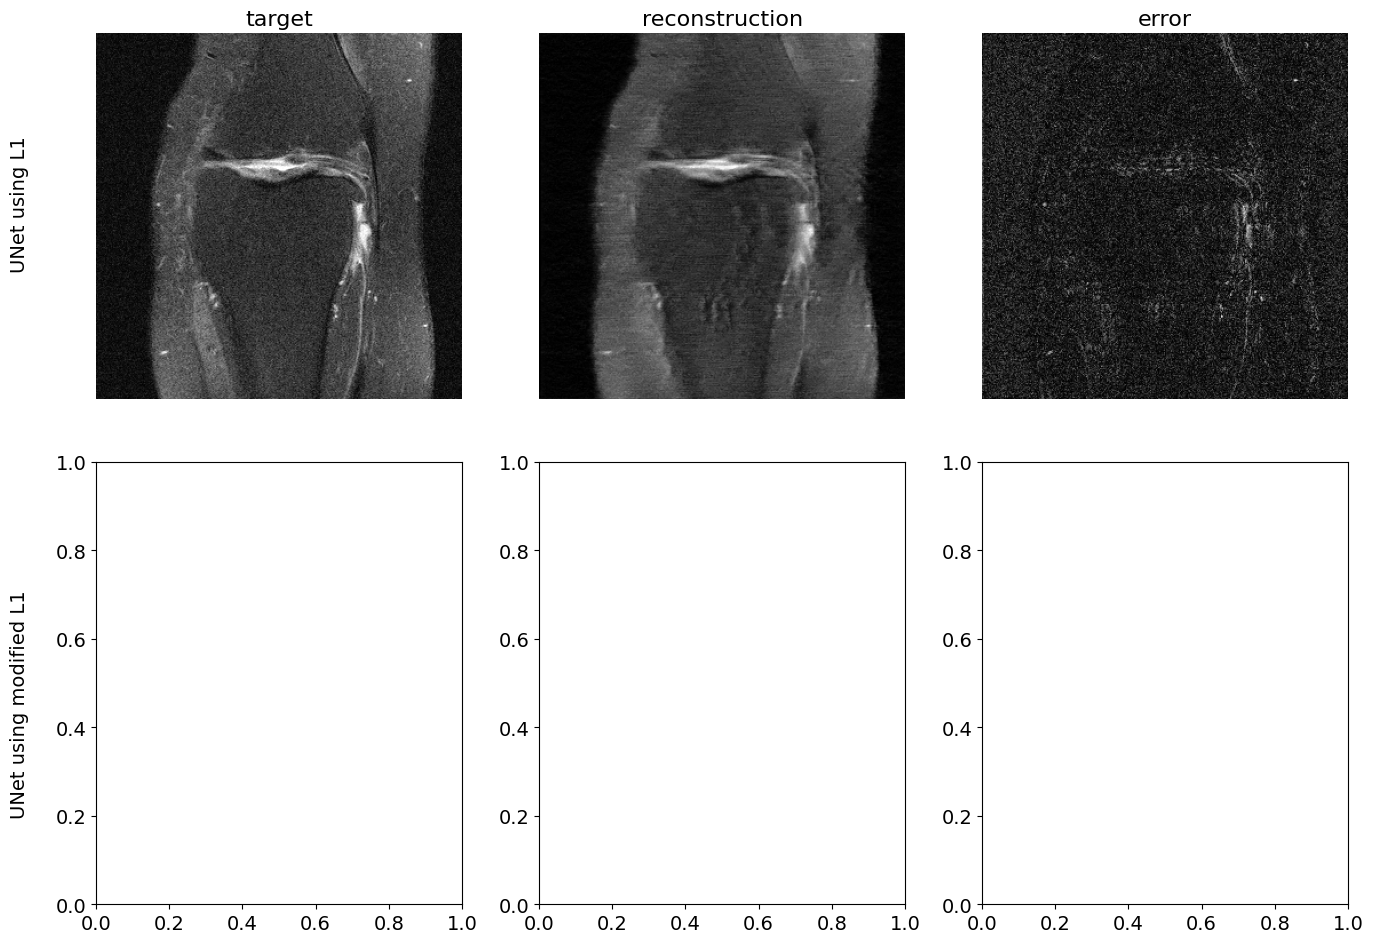

In [38]:
import numpy as np
import io
from PIL import Image

def load_event_logs(log_dir):
    event_acc = EventAccumulator(log_dir, size_guidance={'images': 0})
    event_acc.Reload()
    return event_acc

def extract_images(event_accumulator, tag):
    images = event_accumulator.Images(tag)
    if images:
        image_data = images[-1]  # Get the latest image event
        image = Image.open(io.BytesIO(image_data.encoded_image_string))
        return np.array(image)
    return None

def plot_images(model_logs, model_labels, image_tags):
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    plt.rc('font', size=14)  # Set the default font size for text

    for row, (log_dir, label) in enumerate(zip(model_logs, model_labels)):
        event_accumulator = load_event_logs(log_dir)
        
        for col, tag in enumerate(image_tags):
            image = extract_images(event_accumulator, tag)
            if image is not None:
                axes[row, col].imshow(image, cmap='gray')
                axes[row, col].axis('off')
                if row == 0:
                    axes[row, col].set_title(tag.split('/')[-1], fontsize=16)
            else:
                print(f"No image found for tag {tag} in model {label}")

    fig.text(0.09, 0.75, 'UNet using L1', fontsize=14, ha='center', va='center', rotation='vertical')
    fig.text(0.09, 0.25, 'UNet using modified L1', fontsize=14, ha='center', va='center', rotation='vertical')

    plt.tight_layout(rect=[0.1, 0, 1, 1])  # Adjust layout to make room for legends on the left
    plt.savefig('model_comparison_images.png', dpi=300)
    plt.show()


config = {
    'log_dirs': [
        # 'lightning_logs/version_unet_l1',
        'lightning_logs/version_3'
    ],
    'labels': [
        'UNet using L1',
        'UNet using modified L1'
    ],
    'image_tags': [
        'val_images_idx_846/target',
        'val_images_idx_846/reconstruction',
        'val_images_idx_846/error'
    ]
}

# Plot the images comparison
plot_images(config['log_dirs'], config['labels'], config['image_tags'])

In [63]:
import os
import pandas as pd
import numpy as np
from PIL import ImageDraw, Image
import matplotlib.pyplot as plt
import h5py

%matplotlib inline

fastmri_path = 'data/singlecoil_train/'
fastmri_file = 'file1000023'
annotation_path = 'data/annotations/knee.csv'

In [64]:
df = pd.read_csv(annotation_path, index_col=None, header=0)
labels_for_file = df.loc[df['file'] == fastmri_file]
labels_for_file['label'].unique()

array(['Bone- Subchondral edema',
       'Cartilage - Partial Thickness loss/defect'], dtype=object)

In [65]:
labels_for_file

,file,slice,study_level,x,y,width,height,label
177,file1000023,5,No,177.0,85.0,18.0,26.0,Bone- Subchondral edema
178,file1000023,6,No,148.0,91.0,47.0,42.0,Bone- Subchondral edema
179,file1000023,7,No,146.0,95.0,47.0,31.0,Bone- Subchondral edema
180,file1000023,8,No,148.0,99.0,23.0,28.0,Bone- Subchondral edema
181,file1000023,23,No,113.0,180.0,26.0,7.0,Cartilage - Partial Thickness loss/defect


In [61]:
datafile = os.path.join(fastmri_path, fastmri_file + '.h5')
f = h5py.File(datafile,'r')
img_data = f['reconstruction_rss'][:]
img_data = img_data[:, ::-1, :]  # flipped up down

In [79]:
def plot_bounding_box(image, labels):
    plotted_image = ImageDraw.Draw(image)
    for label in labels:
        _, _, _, x0, y0, w, h, label_txt = label
        x1 = x0 + w
        y1 = y0 + h
        plotted_image.rectangle(((x0,y0), (x1,y1)), outline="white")
        plotted_image.text((x0, max(0, y0 - 10)), label_txt, fill= "white")
    return np.array(image)

    # center_x, center_y = x + w / 2, y + h / 2
    # # mask[..., y : y + h, x : x + w] = 1
    # width = min(75, w*2.5)
    # height = min(75, h*2.5)
    # min_x, max_x = min(0, center_x - width), max(center_x + width, 320)
    # min_y, max_y = min(0, center_y - height), max(center_y + height, 320)
    # mask[..., int(min_y) : int(max_y), int(min_x) : int(max_x)] = 1

def plot_expanded_bounding_box(image, labels):
    plotted_image = ImageDraw.Draw(image)
    for label in labels:
        _, _, _, x0, y0, w, h, label_txt = label
        center_x, center_y = x0 + w / 2, y0 + h / 2
        width = min(75, w*2.5)
        height = min(75, h*2.5)
        min_x, max_x = max(0, center_x - width), min(center_x + width, 320)
        min_y, max_y = max(0, center_y - height), min(center_y + height, 320)
        print(min_x, min_y, max_x, max_y)
        plotted_image.rectangle(((min_x, min_y), (max_x, max_y)), outline="white")
        plotted_image.text((min_x, max(0, min_y - 10)), label_txt, fill= "white")
    return np.array(image)

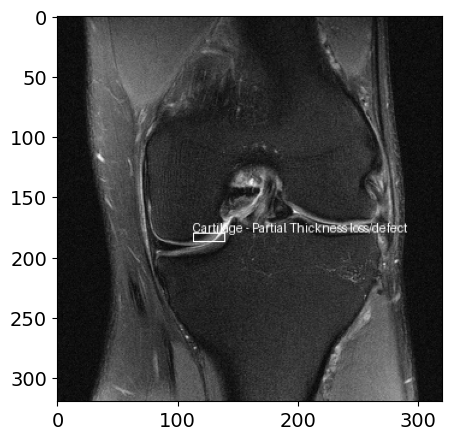

In [80]:
slice_choice = 23
labels_for_slice = labels_for_file.loc[labels_for_file['slice'] == slice_choice].values.tolist()
arrimg = np.squeeze(img_data[slice_choice,:,:])
image_2d_scaled = (np.maximum(arrimg,0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
annotated_img = plot_bounding_box(image_2d_scaled, labels_for_slice)
plt.figure(figsize = (5,5))
plt.imshow(annotated_img,'gray')
plt.show()

61.0 166.0 191.0 201.0


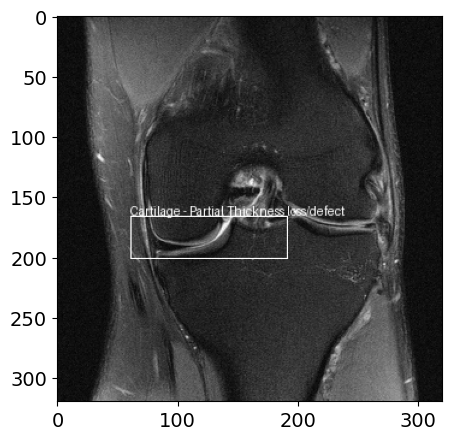

In [81]:
slice_choice = 23
labels_for_slice = labels_for_file.loc[labels_for_file['slice'] == slice_choice].values.tolist()
arrimg = np.squeeze(img_data[slice_choice,:,:])
image_2d_scaled = (np.maximum(arrimg,0) / arrimg.max()) * 255.0
image_2d_scaled = Image.fromarray(np.uint8(image_2d_scaled))
annotated_img = plot_expanded_bounding_box(image_2d_scaled, labels_for_slice)
plt.figure(figsize = (5,5))
plt.imshow(annotated_img,'gray')
plt.show()

In [69]:
df

,file,slice,study_level,x,y,width,height,label
0,file1000001,14,No,90.0,173.0,35.0,10.0,Cartilage - Partial Thickness loss/defect
1,file1000001,15,No,93.0,173.0,39.0,10.0,Cartilage - Partial Thickness loss/defect
2,file1000001,15,No,117.0,162.0,20.0,12.0,Bone- Subchondral edema
3,file1000001,16,No,116.0,163.0,23.0,12.0,Bone- Subchondral edema
4,file1000001,18,No,191.0,186.0,44.0,8.0,Cartilage - Partial Thickness loss/defect
...,...,...,...,...,...,...,...,...
16162,file1002546,14,No,200.0,26.0,70.0,125.0,Joint Effusion
16163,file1002546,15,No,212.0,33.0,58.0,124.0,Joint Effusion
16164,file1002546,16,No,225.0,39.0,47.0,123.0,Joint Effusion
16165,file1002546,22,No,216.0,184.0,20.0,9.0,Cartilage - Partial Thickness loss/defect


In [72]:
areas = []

for i, row in df.iterrows():
    x, y, w, h = row['x'], row['y'], row['width'], row['height']
    area = w * h / (320 * 320)
    areas.append(area)

df['area'] = areas

In [73]:
df['area'].describe()

count    16154.000000
mean         0.016739
std          0.035827
min          0.000000
25%          0.002930
50%          0.005332
75%          0.010986
max          0.450791
Name: area, dtype: float64

In [5]:
val_loss = extract_validation_loss(event_test)

KeyError: 'Key val_loss was not found in Reservoir'

In [6]:
log_dirs

['lightning_logs/version_unet_l1', 'lightning_logs/version_unet_roi']

In [5]:
config = {
    'checkpoints': [
        'lightning_logs/version_unet_l1',
        'lightning_logs/version_unet_roi'
    ]
}

# log_dirs = [os.path.join(os.path.dirname(checkpoint), 'logs') for checkpoint in config['checkpoints']]
log_dirs = [checkpoint for checkpoint in config['checkpoints']]

# Plot the validation loss comparison
plot_validation_loss(log_dirs[0], log_dirs[1])

DirectoryDeletedError: Directory l has been permanently deleted

<Figure size 1000x600 with 0 Axes>